In [1]:
import numpy as np

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
# rysowanie grafu na podstawie macierzy adjacencji grafu skierowanego
def draw_graph_from_adjacency_matrix(matrix):
    # create graph
    G = nx.from_numpy_matrix(np.matrix(matrix), create_using=nx.DiGraph())

    # positions for all nodes
    pos = nx.fruchterman_reingold_layout(G)

    plt.figure(figsize=(8, 8), facecolor='white')
    # draw nodes
    nx.draw_networkx_nodes(G, pos, node_size=200, node_color='#A0CBE2')
    # draw edges
    nx.draw_networkx_edges(G, pos, width=2, alpha=0.5)
    # draw labels
    nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

    plt.axis('off')
    plt.show()

In [4]:
# macierz adjacencji losowego grafu skierowanego
def random_adjacency_matrix(n=100):
    return np.random.randint(2, size=(n,n), dtype=np.int)

In [5]:
# Fv oznacza zbiór wierzchołków, do których dochodzą krawędzie z wierzchołka v
def v_out_vertices(matrix, v):
    vertices = []
    for u in range(0, len(matrix)):
        if matrix[v][u] == 1:
            vertices.append(u)
    return vertices

In [6]:
# liczność zbioru Fv - wartość Nv (ilość krawędzi wychodzących z wierzchołka v)
def v_out_degree(matrix, v):
    return len(v_out_vertices(matrix, v))

In [7]:
# Bu jest zbiorem wierzchołków, z których wychodzą krawędzie do wierzchołka u
def v_in_vertices(matrix, u):
    vertices = []
    for v in range(0, len(matrix)):
        if matrix[v][u] == 1:
            vertices.append(v)
    return vertices

In [8]:
# liczność zbioru Bu (ilość krawędzi wchodzących do wierzchołka u)
def v_in_degree(matrix, u):
    return len(v_in_vertices(matrix, u))

In [9]:
# ranking początkowy
def start_rank(matrix):
    return [1]*len(matrix)

In [10]:
# A jest macierzą adiacencji grafu, w której każdy wiersz u jest przeskalowany wyjściowym stopniem wierzchołka u
def scaled_adjacency_matrix(matrix):
    N = np.zeros(len(matrix), dtype=np.int)
    
    for i in range(0, len(matrix)):
        N[i] = v_out_degree(matrix, i)
        
    A = np.zeros((len(matrix), len(matrix)))
    for u in range(0, len(matrix)):
        for v in range(0, len(matrix[u])):
            if matrix[u][v] == 1:
                A[u][v] = 1/N[u]
                
    return A

In [39]:
# prosty model błądzenia przypadkowego po grafie skierowanym
def rank(matrix, d, r):
    new_rank = np.zeros(len(matrix))
    
    for u in range(0, len(matrix)):
        rank_value = 0
        rank_sum = 0
        for v in v_in_vertices(matrix, u):
            if v_in_degree(matrix, v) != 0:
                rank_sum += r[v]/v_in_degree(matrix, v)
        rank_value = d * rank_sum
        new_rank[u] = rank_value
        
    return new_rank

In [40]:
def page_rank(matrix, d, iterations=10):
    A = scaled_adjacency_matrix(matrix)
    start_r = start_rank(matrix)
    page_r = rank(matrix, d, start_r)
    for i in range(0,iterations):
        page_r = rank(matrix, d, page_r)
    return page_r

In [13]:
def plot_page_rank(page_rank, figwidth=8):
    
    y_pos = np.arange(len(page_rank))
    
    plt.figure(figsize=(figwidth, 4), facecolor='white')

    plt.bar(y_pos, page_rank, align='center', color='#A0CBE2', alpha=0.5)
    plt.xticks(y_pos, y_pos)
    plt.xlabel('Page ID')
    plt.ylabel('Rank value')
    plt.title('Page rank')
 
    plt.show()

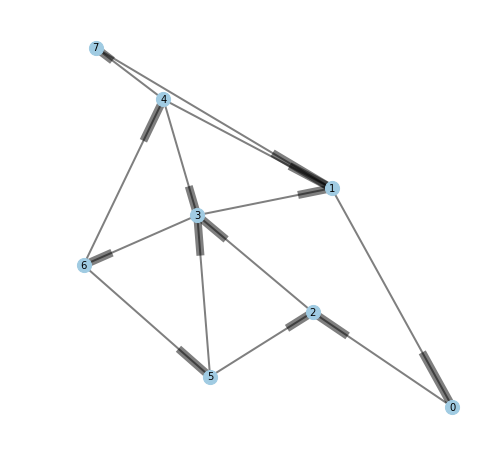

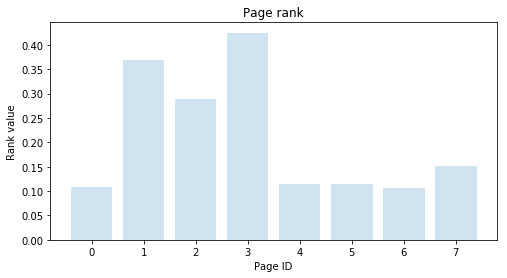

In [14]:
lab_matrix = [[0,0,1,0,0,0,0,0],
              [1,0,0,0,0,0,0,0],
              [0,0,0,1,0,0,0,0],
              [0,1,0,0,0,0,1,0],
              [0,1,0,1,0,0,0,1],
              [0,0,1,1,0,0,0,0],
              [0,0,0,0,1,1,0,0],
              [0,1,0,0,0,0,0,0]]

# test dla wartości d=0.85, grafu podanego na laboratorium (o 8 wierchołkach)
draw_graph_from_adjacency_matrix(lab_matrix)
plot_page_rank(page_rank(lab_matrix, d=0.85, iterations=100))

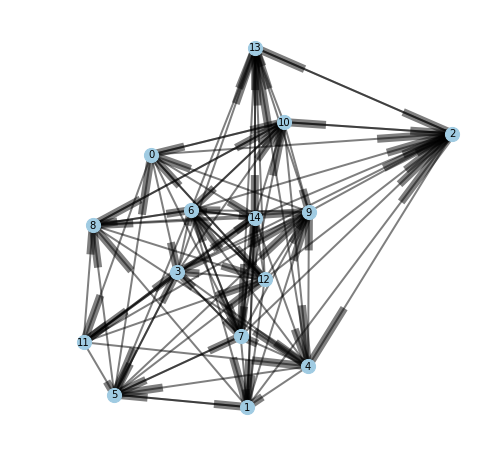

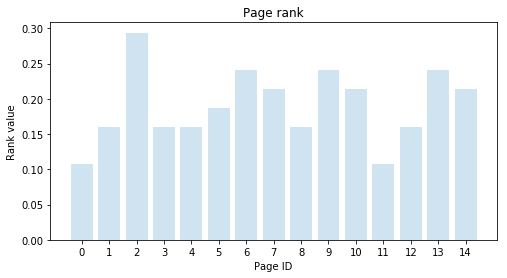

In [15]:
# test dla wartości d=0.85, losowego grafu o 15 wierchołkach
matrix = random_adjacency_matrix(15)
draw_graph_from_adjacency_matrix(matrix)
plot_page_rank(page_rank(matrix, d=0.85, iterations=100))

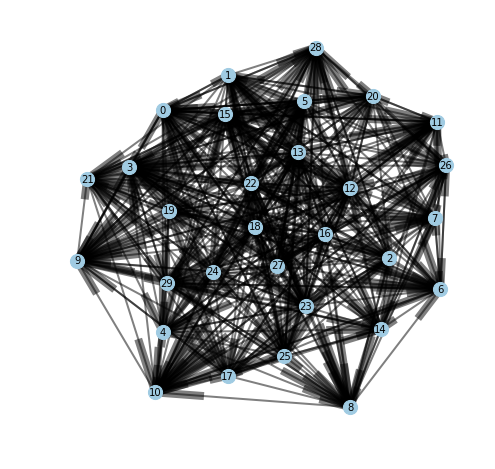

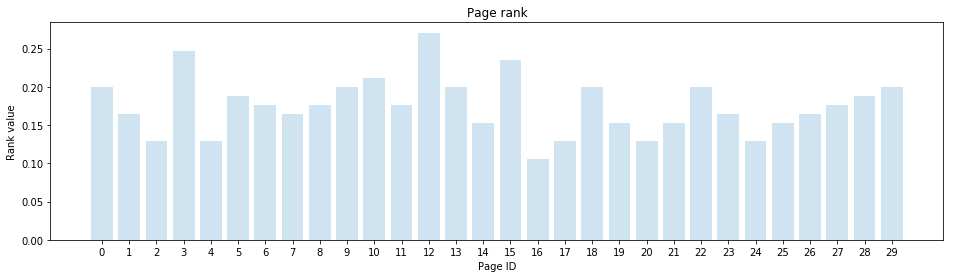

In [16]:
# test dla wartości d=0.85, losowego grafu o 30 wierchołkach
matrix = random_adjacency_matrix(30)
draw_graph_from_adjacency_matrix(matrix)
plot_page_rank(page_rank(matrix, d=0.85, iterations=100), figwidth=16)

In [32]:
# Rozszerz model z poprzedniego zadania, dodając możliwość skoku do losowego wierzchołka grafu
def complex_rank(matrix, d, e, r):
    new_rank = np.zeros(len(matrix))
    
    for u in range(0, len(matrix)):
        rank_value = 0
        rank_sum = 0
        for v in v_in_vertices(matrix, u):
            if v_in_degree(matrix, v) != 0:
                rank_sum += r[v]/v_in_degree(matrix, v)
        rank_value = d * rank_sum + (1 - d)*e[u]
        
        new_rank[u] = rank_value
        
    return new_rank

In [33]:
def complex_page_rank(matrix, d, e, iterations=10):
    A = scaled_adjacency_matrix(matrix)
    start_r = start_rank(matrix)
    page_r = complex_rank(matrix, d, e, start_r)
    for i in range(0,iterations):
        page_r = complex_rank(matrix, d, e, page_r)
    return page_r

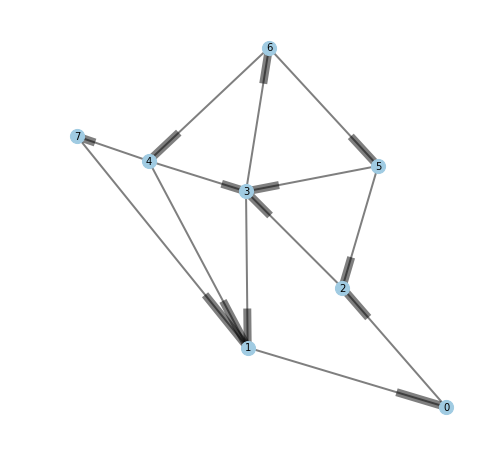

In [19]:
# graf podany na laboratorium (o 8 wierchołkach)
draw_graph_from_adjacency_matrix(lab_matrix)

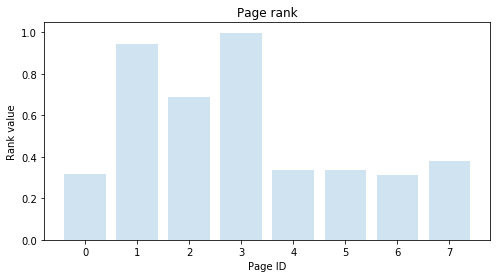

In [20]:
# test dla wartości d=0.85, e=1/3*[1,1,..], 
pr = complex_page_rank(lab_matrix, d=0.85, e=[1/3]*len(matrix))
plot_page_rank(pr)

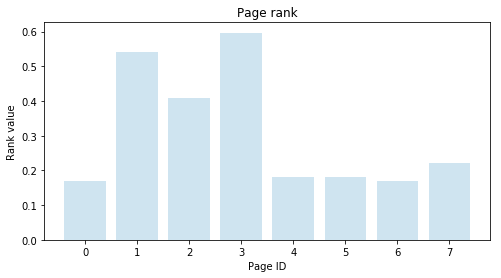

In [21]:
# test dla wartości d=0.85, e=1/10*[1,1,..]
pr = complex_page_rank(lab_matrix, d=0.85, e=[1/10]*len(matrix))
plot_page_rank(pr)

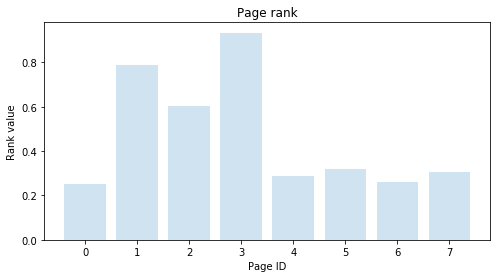

In [22]:
# test dla wartości d=0.85, e o różnych wartościach
pr = complex_page_rank(lab_matrix, d=0.85, e=[0.2, 0.1, 0.2, 0.5, 0.3, 0.5, 0.1, 0.1])
plot_page_rank(pr)

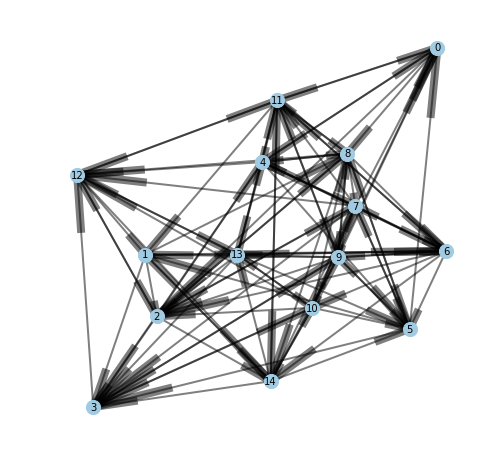

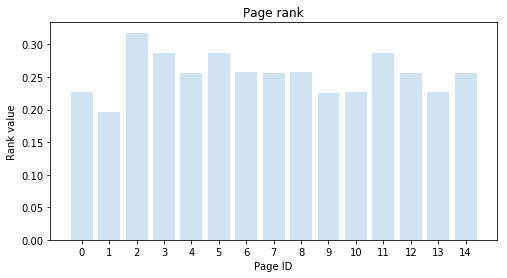

In [23]:
# test dla wartości d=0.85, e=1/10*[1,1,..], losowego grafu o 15 wierchołkach
matrix = random_adjacency_matrix(15)
draw_graph_from_adjacency_matrix(matrix)
pr = complex_page_rank(matrix, d=0.85, e=[1/10]*len(matrix), iterations=1000)
plot_page_rank(pr)

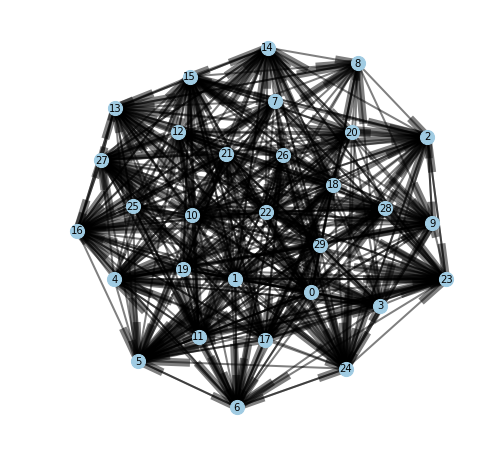

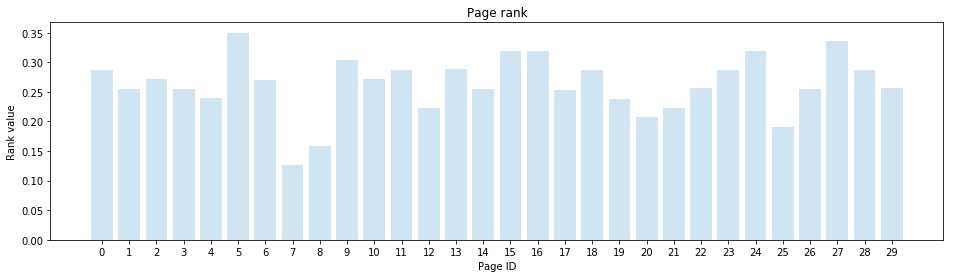

In [24]:
# test dla wartości d=0.85, e=1/10*[1,1,..], losowego grafu o 30 wierchołkach
matrix = random_adjacency_matrix(30)
draw_graph_from_adjacency_matrix(matrix)
pr = complex_page_rank(matrix, d=0.85, e=[1/10]*len(matrix), iterations=1000)
plot_page_rank(pr, figwidth=16)

In [25]:
# test dla grafów XXXX

In [26]:
# https://snap.stanford.edu/data/web-Stanford.html
# https://snap.stanford.edu/data/web-NotreDame.html

In [30]:
stanford_file = open('web-Stanford.txt').readlines()[4:]
stanford_nodes = 281904
stanford_edges = 2312497

stanford_node_max_value = 1000

stanford_adjacency_matrix = np.zeros((stanford_node_max_value, stanford_node_max_value), dtype=np.int)

for line in stanford_file:
    edge = line.split('\t')
    fromNode, toNode = int(edge[0]), int(edge[1])
    
    if fromNode < stanford_node_max_value and toNode < stanford_node_max_value:
        stanford_adjacency_matrix[fromNode][toNode] = 1

In [48]:
pr = complex_page_rank(stanford_adjacency_matrix, d=0.85, e=[1/10]*len(stanford_adjacency_matrix))

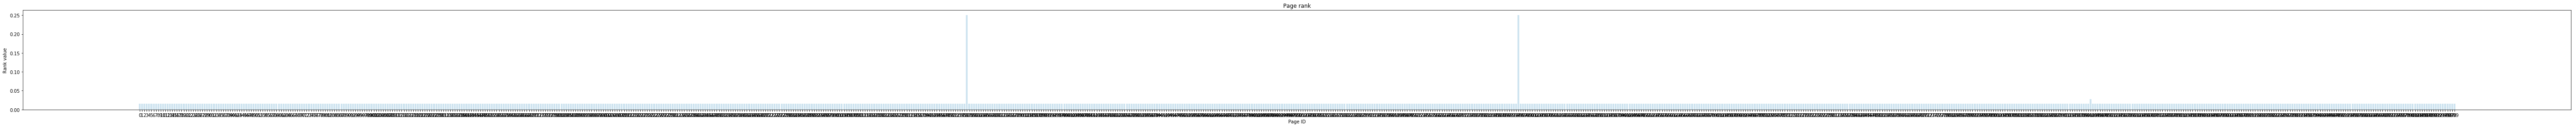

In [49]:
plot_page_rank(pr, figwidth=100)

In [50]:
pr

array([ 0.015     ,  0.015     ,  0.015     ,  0.015     ,  0.015     ,
        0.015     ,  0.015     ,  0.015     ,  0.015     ,  0.015     ,
        0.015     ,  0.015     ,  0.015     ,  0.015     ,  0.015     ,
        0.015     ,  0.015     ,  0.015     ,  0.015     ,  0.015     ,
        0.015     ,  0.015     ,  0.015     ,  0.015     ,  0.015     ,
        0.015     ,  0.015     ,  0.015     ,  0.015     ,  0.015     ,
        0.015     ,  0.015     ,  0.015     ,  0.015     ,  0.015     ,
        0.015     ,  0.015     ,  0.015     ,  0.015     ,  0.015     ,
        0.015     ,  0.015     ,  0.015     ,  0.015     ,  0.015     ,
        0.015     ,  0.015     ,  0.015     ,  0.015     ,  0.015     ,
        0.015     ,  0.015     ,  0.015     ,  0.015     ,  0.015     ,
        0.015     ,  0.015     ,  0.015     ,  0.015     ,  0.015     ,
        0.015     ,  0.015     ,  0.015     ,  0.015     ,  0.015     ,
        0.015     ,  0.015     ,  0.015     ,  0.015     ,  0.01

In [43]:
notredame_file = open('web-NotreDame.txt').readlines()[4:]
notredame_nodes = 325729
notredame_edges = 1497134

notredame_node_max_value = 1000

notredame_adjacency_matrix = np.zeros((notredame_node_max_value, notredame_node_max_value), dtype=np.int)

for line in notredame_file:
    edge = line.split('\t')
    fromNode, toNode = int(edge[0]), int(edge[1])
    if fromNode < notredame_node_max_value and toNode < notredame_node_max_value:
        notredame_adjacency_matrix[fromNode][toNode] = 1

In [44]:
pr_notre = complex_page_rank(notredame_adjacency_matrix, d=0.85, e=[1/10]*len(notredame_adjacency_matrix), iterations=10)

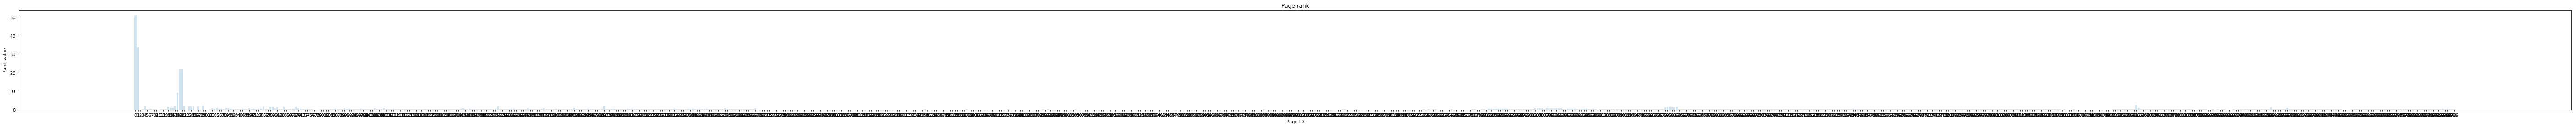

In [45]:
plot_page_rank(pr_notre, figwidth=100)

In [47]:
pr_notre

array([ 51.13796958,  33.81163627,   0.07257744,   0.22114456,
         1.79555317,   0.24783619,   0.39051439,   0.29464958,
         0.1495267 ,   0.32053327,   0.07257744,   0.31601543,
         0.20219016,   0.16731304,   1.33891217,   0.87775035,
         0.84223062,   1.84171909,   9.00202042,  21.66212252,
        21.79184613,   1.96656555,   0.06571382,   1.64494585,
         1.58276193,   1.70890411,   0.06571382,   1.58276193,
         0.06571382,   2.05696169,   0.06571382,   0.06571382,
         0.12418206,   0.68097555,   0.34972293,   0.89391764,
         0.48531642,   0.45405869,   0.29631863,   0.90930418,
         0.64691796,   0.37198939,   0.09333974,   0.155158  ,
         0.30509486,   0.28876093,   0.49524899,   0.18590267,
         0.13364841,   0.81435335,   0.1884503 ,   0.51320979,
         0.1884503 ,   0.45591291,   0.32257556,   1.57376675,
         0.23333953,   0.22921511,   1.43073465,   1.35263392,
         0.78995922,   1.14407897,   0.13094365,   0.30